In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
#pip install matplotlib


In [3]:
#pip install scikit-learn

## CIFAR-10
## 10 Classe, 6000 per class, 60K Images

![Cifar10](images/vlcsnap-2024-09-15-17h40m46s514.png)





In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

In [5]:
# Transform variable
# Compose allows us to add an arrayof different transformations
transform = transforms.Compose([

    # trainset dataset(below) to tensor
    transforms.ToTensor(),

    # normalization: Every pixel 0-255, divide by 255, to get values between 0 and 255
    # But here - from [0, 1] to [-1, 1]
    # parameters - means, SD and apply it for each channels - RGB - 3 channels
    transforms.Normalize(
        (0.5, 0.5, 0.5), # mean for each channels, since range is from 0 to 1
        (0.5, 0.5, 0.5), # SD for each channels
    )

])

In [6]:
# Load Dataset - Train
trainset = torchvision.datasets.CIFAR10(
    root = "./data", # download the dataset in the directory 'data'
    download = True, 
    train = True,
    #We need to transform everything to tensor
    transform = transform
)

Files already downloaded and verified


In [7]:
batch_size = 128
# We will add mini batch SD
# We can create dataloader in PyTorch - to convert it to mini batches

trainLoader = torch.utils.data.DataLoader(
    trainset,
    batch_size = batch_size,
    shuffle = True, 
    num_workers = 2, # Different jobs*
)

In [8]:
# See how the dataloader looks like
# Iterate through trainLoader

for data in trainLoader:
    # data[0] - image
    # data[1] - label
    print(data[1])

    # To check the batch size 
    print(data[0].shape) # 128 images and each image (3 - Chennels, 32 - Height, 32 - Width)
    # Each pixel contains between -1 to 1 because of normalization
   

tensor([1, 2, 1, 8, 6, 8, 1, 8, 8, 1, 9, 2, 8, 2, 3, 0, 0, 2, 2, 1, 5, 6, 0, 2,
        1, 0, 3, 3, 0, 1, 6, 1, 0, 7, 2, 0, 0, 8, 7, 1, 7, 8, 2, 1, 0, 0, 9, 3,
        6, 9, 4, 7, 4, 3, 8, 9, 8, 9, 9, 9, 9, 8, 0, 3, 6, 4, 9, 7, 9, 8, 3, 2,
        8, 9, 5, 5, 1, 6, 2, 8, 6, 0, 9, 4, 6, 8, 8, 9, 3, 4, 3, 0, 2, 9, 8, 5,
        3, 2, 6, 8, 0, 7, 6, 0, 7, 3, 3, 1, 8, 6, 6, 7, 9, 1, 0, 6, 0, 5, 8, 4,
        7, 5, 8, 0, 8, 9, 1, 0])
torch.Size([128, 3, 32, 32])
tensor([5, 3, 0, 8, 0, 7, 9, 8, 7, 3, 0, 1, 9, 0, 0, 9, 0, 3, 6, 0, 4, 4, 4, 2,
        1, 6, 0, 9, 6, 1, 9, 0, 6, 1, 5, 6, 9, 3, 1, 0, 2, 3, 7, 9, 1, 3, 9, 3,
        9, 1, 4, 5, 4, 9, 4, 4, 2, 5, 1, 4, 5, 0, 3, 0, 8, 2, 4, 1, 5, 6, 5, 1,
        3, 2, 5, 8, 9, 0, 8, 6, 3, 9, 0, 8, 1, 7, 0, 1, 5, 5, 1, 1, 9, 3, 5, 3,
        4, 9, 0, 2, 6, 4, 5, 6, 5, 0, 1, 9, 8, 6, 4, 9, 6, 3, 7, 5, 5, 2, 0, 4,
        0, 6, 8, 4, 0, 3, 7, 3])
torch.Size([128, 3, 32, 32])
tensor([8, 7, 3, 1, 2, 0, 5, 5, 6, 1, 6, 1, 1, 4, 6, 8, 7, 1, 4, 8, 6, 8, 4,

In [9]:
# For test dataset
testValidSet = torchvision.datasets.CIFAR10(
    root = "./data", # download the dataset in the directory 'data'
    download = True, 
    train = False,
    #We need to transform everything to tensor
    transform = transform
)

Files already downloaded and verified


In [10]:
# Split testValidSet dataset
validSet, testSet = torch.utils.data.random_split(
    testValidSet,
    (5000, 5000)
)

In [11]:
 # Create valid DataLoader
validLoader = torch.utils.data.DataLoader(
    validSet,
    batch_size = batch_size,
    shuffle = False,
    num_workers = 2
)

In [12]:
for data in validLoader:
    print(data[0].shape)

torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([12

In [13]:
# Test Loader
testLoader = torch.utils.data.DataLoader(
    testSet,
    batch_size = batch_size,
    shuffle = False, 
    num_workers = 2
)

In [14]:
for data in testLoader:
    print(data[0].shape)

torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([128, 3, 32, 32])
torch.Size([12

In [15]:
# Set Classes

classes = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"

]

## Visualize Data

In [16]:
# Function to Display Image

def imgShow(img):

    # Unnormalize from [-1, 1] to [0, 1]
    img = img / 2 + 0.5

    # Convert to Numpy
    img = img.numpy()

    # transpose
    # from [channels, height, width] = [height, width, channels]
    imgTransposed = np.transpose(img, (1, 2, 0))

    # Plot image
    plt.imshow(imgTransposed)

    plt.show()

In [17]:
# Iter function - call iter method on iterable object
dataIter = iter(trainLoader)


# Get first element on iterable
# Each item in the iterable is batch, 1 batch contain 128 different images

images, labels = dataIter.__next__()

print(images.shape)



torch.Size([128, 3, 32, 32])


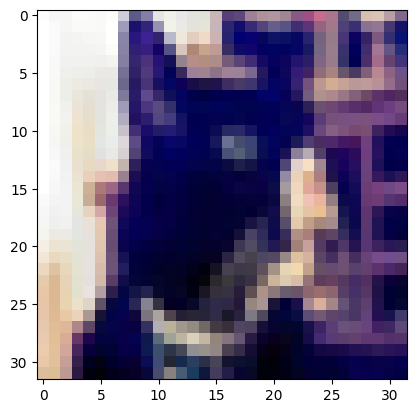

cat
torch.Size([3, 32, 32])


In [18]:
# Select image

imageIdx = 0

# Show Image

imgShow(images[imageIdx])
print(classes[labels[imageIdx]]) #Its a number

print(images[imageIdx].shape)

## Defining the Neural Network

In [19]:
# Define model
# init: define layers
# forward: data flows through the model

class CNN(nn.Module):

    # Define init method
    def __init__(self, hidden_layer = 100):
        super().__init__()


        # Conv 1
        # input channels, output channels(feature map)/ no. of filters(6 diff. filters), kernel/filter size
        # 6 filters and this filters has different parameters(we need to update this weights)
        self.conv1 = nn.Conv2d(3, 6, 5)

        # Pooling Layer
        # kernel size, stride
        # No parameter updation
        self.pool = nn.MaxPool2d(2, 2)

        # Flatten

        # Fully connected layer
        # input dimension(we select 10 arbitarily), output dimension
        # The input image was 32x32 but due to Conv2D and MaxPool2D it has different and lower dimensions
        self.fc1 = nn.Linear(1176, hidden_layer) #1st parameter - After Pooling

        #Output layer
        #Output dimension 10 - because 10 outputs
        self.out = nn.Linear(hidden_layer, 10)


        # For Convolution layer and Fully connected layer we have ReLU activation

        # activation function
        self.act = nn.ReLU()


    # Define forward method
    def forward(self, x):

        # Print the shape of the input data
        #print('Inside Forward, before conv1: ', x.shape)

        # Convolution 1
        # For each feature map we need to add activation function
        x = self.act(self.conv1(x))
        
        # Different dimension because of feature map
        #print('After conv1: ', x.shape)

        # Pooling layer
        x = self.pool(x)

        #print('After Pooling(Pooling for 6 diff. feature map): ', x.shape)


        # Flattening
        # [batch size, multiplication of dimensions]
        # view - change the shape only
        x = x.view(-1, 6*14*14) # 2nd parameter - After Pooling

        #print(x.shape) # Now we know the input to the Fully Connected Layer


        # Fc1
        x = self.act(self.fc1(x))

        #print(x.shape)


        # Output Layer

        x = self.out(x)


        #print(x.shape)

        # Return Output
        return x

        



In [20]:
# Define Model

model = CNN() 

print(model)

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1176, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=10, bias=True)
  (act): ReLU()
)


In [21]:
# Call Iter method
dataIter = iter(trainLoader)

# Get first item
images, labels = dataIter.__next__()

#print(images.shape)

# Pass mini batch to forward pass of model
test = model.forward(images)

print("Image shape - output from Model: ", model.forward(images).shape)

print(test)


Image shape - output from Model:  torch.Size([128, 10])
tensor([[ 0.1107,  0.2583, -0.0150,  ...,  0.1488,  0.0243,  0.1549],
        [ 0.0506,  0.0954,  0.0566,  ...,  0.1320, -0.0131,  0.0984],
        [ 0.0688,  0.0835,  0.0577,  ...,  0.1112,  0.0145,  0.1241],
        ...,
        [ 0.1180,  0.0942, -0.0281,  ...,  0.1583, -0.0381,  0.1718],
        [ 0.0584,  0.1666,  0.0149,  ...,  0.1344,  0.0494,  0.1395],
        [ 0.0518,  0.1928,  0.0011,  ...,  0.1074,  0.0763,  0.1507]],
       grad_fn=<AddmmBackward0>)


In [22]:
print(test.shape)

torch.Size([128, 10])


## Define Cost Function and Optimizer

In [23]:
# Cost function
costFunction = nn.CrossEntropyLoss()

# Optimizer(to update parameters), for self.conv1
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)


## Train Model - Train dataset

![Training](images/nn_training.png)

Epoch 0
Train loss:  0.012928404891490936
Valid loss:  2.9597673416137694e-05
Metric Valid 0.015625
Epoch 1
Train loss:  0.010690325133800506
Valid loss:  2.2675983905792237e-05
Metric Valid 0.015625
Epoch 2
Train loss:  0.009769262080192565
Valid loss:  2.117187976837158e-05
Metric Valid 0.015625
Epoch 3
Train loss:  0.009128613950014115
Valid loss:  1.927483320236206e-05
Metric Valid 0.01875
Epoch 4
Train loss:  0.008630261412858962
Valid loss:  1.5990909337997436e-05
Metric Valid 0.01875
Epoch 5
Train loss:  0.008236251044273377
Valid loss:  1.873156189918518e-05
Metric Valid 0.015625
Epoch 6
Train loss:  0.007869836065769195
Valid loss:  2.6091928482055663e-05
Metric Valid 0.0125
Epoch 7
Train loss:  0.0075573757266998295
Valid loss:  2.9082295894622803e-05
Metric Valid 0.009375
Epoch 8
Train loss:  0.007280361843109131
Valid loss:  2.933232545852661e-05
Metric Valid 0.009375
Epoch 9
Train loss:  0.007025555157661438
Valid loss:  3.181897163391113e-05
Metric Valid 0.00625


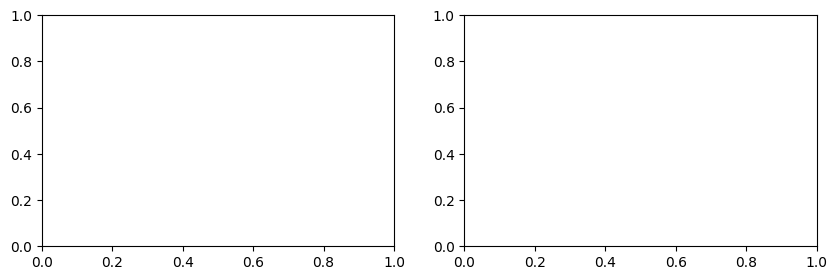

In [24]:
epochs = 10

# train loss array
trainLossArray = np.zeros(shape = (epochs))

# Create plot
fig, ax = plt.subplots(1, 2, figsize = (10, 3))

# Iterate on Epochs
for i in range(epochs):
    
    print(f"Epoch {i}")

    # Plot loss function for entire dataset instead of each mini batch
    epoch_train_loss = 0


    # TRAINING
    # Iterate on batches of the training dataset
    for tmp in trainLoader:
        #tmp[0] is the image data
        #tmp[1] is the label

        #print(tmp[0].shape)

        data = tmp[0]
        label = tmp[1]

        # Get model predictions
        prediction = model.forward(data)

        #print(prediction.shape) # Shape of the mini batch, dimension should be 10 for each class


        # With the labels and predictions - we will get the cost function
        loss = costFunction(prediction, label) # This loss will be for each mini batch

        #print(loss)
        # Step 1: Get the Cost Value
        # Step 2: Get gradient value, backpropagation
        # Step 3: Update Parameters

        # We need to add IMPORTANT
        # PyTorch by default save and restore the value of the end of the gradient
        # We need absolute value not accumulative, To stop the accumulation of the gradient values
        # And to get unique value for each mini batch, set to zero for gradient 

        # gradient to zero
        optimizer.zero_grad()

        # Compute gradient value using backpropagation
        loss.backward()

        # Update the parameters  - Adam
        # Step method will take gradient from loss value and update the parameters using Adam
        optimizer.step()

        # Sum loss values
        epoch_train_loss += loss.item() 

    # add loss value of the itteration
    #trainLossArray[i] = epoch_train_loss / 50000 # Average loss
    
    print("Train loss: ", epoch_train_loss / 50000 )

    # Validation

    epoch_valid_loss = 0

    metric_valid = 0

    batch_counter = 0
    
    for tmp in validLoader:

        labelsVal = tmp[1]
        dataVal = tmp[0]

        # get predictions
        predictionsVal = model.forward(dataVal)

        # get cost function value

        lossVal = costFunction(predictionsVal, labelsVal)

        epoch_valid_loss = lossVal.item()

        batch_counter += 1

    print("Valid loss: ", epoch_valid_loss / 50000 )


    # Compute metric value in mini batch
    metric_valid += accuracy_score(
         
         # True values
         labelsVal,

         # Prediction Values
         torch.argmax(predictionsVal, 1).detach().numpy()
    )
    

    print("Metric Valid", metric_valid/batch_counter)
    # PLOT

    # ax[0].plot(trainLossArray[0:i], c = "red")

    # fig.canvas.draw()



## Test Dataset and Get Metrics

In [25]:
for tmp in testLoader:


    data = tmp[0]
    labels = tmp[1]

    predictions = model.forward(data)


    print(predictions.shape)

torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([8, 10])
